# Sentiment analysis model

Sentiment analysis is a common NLP task that involves determining whether a piece of text expresses a positive, negative, or neutral sentiment.

We'll build a sentiment analysis pipeline using Python, and the workflow will include the following steps:

Data Collection: We'll use a publicly available dataset.
Data Preprocessing: Cleaning and preparing the text data.
Vectorization: Converting text into numerical features.
Model Training: Training a machine learning model.
Model Evaluation: Evaluating the performance of the model.
Prediction: Using the model to predict sentiment on new text.

## 1. Data Collection

We'll use the IMDb movie reviews dataset, which is a popular dataset for sentiment analysis.

In [1]:
# Install necessary packages if you haven't already
#!pip install nltk

In [2]:
import nltk
from nltk.corpus import movie_reviews
import pandas as pd

# Download the dataset
nltk.download('movie_reviews')

# Load the dataset
documents = [(list(movie_reviews.words(fileid)), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]

# Convert to DataFrame
df = pd.DataFrame(documents, columns=['text', 'label'])

# Preview the data
print(df.head())

[nltk_data] Downloading package movie_reviews to
[nltk_data]     /Users/benazirrowe/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


                                                text label
0  [plot, :, two, teen, couples, go, to, a, churc...   neg
1  [the, happy, bastard, ', s, quick, movie, revi...   neg
2  [it, is, movies, like, these, that, make, a, j...   neg
3  [", quest, for, camelot, ", is, warner, bros, ...   neg
4  [synopsis, :, a, mentally, unstable, man, unde...   neg


Check the class distribution to make sure we are not dealing with imbalanced dataset

Class Distribution:
neg    1000
pos    1000
Name: label, dtype: int64


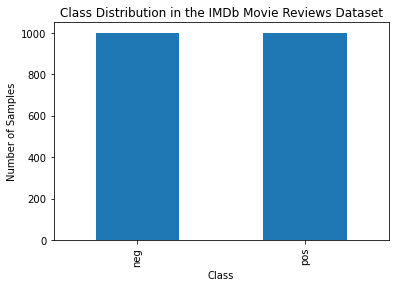

In [3]:
# Count the number of samples in each class
class_counts = df['label'].value_counts()

# Display the class counts
print("Class Distribution:")
print(class_counts)

# Plot the class distribution
import matplotlib.pyplot as plt

class_counts.plot(kind='bar')
plt.title('Class Distribution in the IMDb Movie Reviews Dataset')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.show()


## 2. Data Preprocessing

We'll clean the text data by removing HTML tags, punctuation, and converting text to lowercase.

In [4]:
import re
from sklearn.model_selection import train_test_split

def preprocess_text(words):
    text = ' '.join(words)
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    return text

# Apply preprocessing
df['cleaned_text'] = df['text'].apply(preprocess_text)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df['cleaned_text'], df['label'], test_size=0.2, random_state=42)

## 3. Vectorization

We'll use TF-IDF vectorization to convert the text data into numerical features.

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Fit and transform the training data, transform the test data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


## 4. Model Training

We'll use a simple logistic regression model for training.

In [6]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the model
model = LogisticRegression(class_weight='balanced')
model.fit(X_train_tfidf, y_train)


LogisticRegression(class_weight='balanced')

## 5. Model Evaluation

We'll evaluate the model's performance using accuracy, precision, recall, and F1-score.

In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Predict on the test set
y_pred = model.predict(X_test_tfidf)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='pos')
recall = recall_score(y_test, y_pred, pos_label='pos')
f1 = f1_score(y_test, y_pred, pos_label='pos')

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')
print('\nClassification Report:\n', classification_report(y_test, y_pred))


Accuracy: 0.80
Precision: 0.80
Recall: 0.82
F1-score: 0.81

Classification Report:
               precision    recall  f1-score   support

         neg       0.81      0.79      0.80       199
         pos       0.80      0.82      0.81       201

    accuracy                           0.80       400
   macro avg       0.80      0.80      0.80       400
weighted avg       0.80      0.80      0.80       400



## 6. Prediction

We'll use the trained model to predict the sentiment of new text data.

In [9]:
def predict_sentiment(text):
    text = re.sub(r'[^\w\s]', '', text.lower())
    vectorized_text = tfidf_vectorizer.transform([text])
    prediction = model.predict(vectorized_text)[0]
    return prediction

# Test the function with a new review
new_review = "It's kind of boring"
predicted_sentiment = predict_sentiment(new_review)
print(f'The sentiment of the review is: {predicted_sentiment}')


The sentiment of the review is: neg


In this revised workflow, we used the nltk library to load a sample of the IMDb movie reviews dataset. The steps included data collection, preprocessing, vectorization, model training, evaluation, and prediction. This approach should help you build and test a sentiment analysis model successfully.